<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2024/25 Term 2
</div>

# CS105 Group Project Submission (Part I)

-----
Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section: G2
#### Team: T3
#### Members:
1. Bradley Goh
2. Denzyl Ng
3. Jared Yeo
4. Nagaraj Yohapriya
5. Zhang Zemin

#### Dataset: Credit

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

**Response.** 
The dataset contains data of individuals applying for a credit facility in a bank. Each row corresponds to a different applicant and contains attributes captured by bank during an application. The approval status of each application is also captured in each row.

**b.** State the size of the dataset

**Response.**
1000 rows x 23 columns

**c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Response.**
ID - Identification number - Categorical
Checking_Account - Status of checking account - Categorical
Duration - Credit duration in months - Numerical
Payment_Status - Credit history - Categorical
Purpose - Purpose of credit - Categorical
Amount - Credit amount - Numerical
Savings_Account - Status of savings account - Categorical
Employment - Length of current employment - Categorical
Installment - Installment rate as percentage of disposable income - Numerical
Personal_Status - Marital status and sex - Categorical
Guarantors - Other debtors or guarantors - Categorical
Residence_Length - Number of years staying in current residence - Categorical
Assets - Asset ownership - Categorical
Age - Age in years - Numerical
Credit_Rating - Credit rating - Numerical
Existing_Credits - Other existing credit in place - Categorical
Housing_Type - Type of apartment - Categorical
Num_Credits - Number of existing credits - Numerical
Occupation - Occupation - Categorical
Dependents - Number of dependents - Numerical
Telephone - Has telephone - Categorical
Foreign_Worker - Foreign worker or not - Categorical
Approval - Loan approval status - Categorical

### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

In [6]:
#**Response.** 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

credit = pd.read_csv("credit.csv")

#percentage of missing values for each column
missing = credit.apply(lambda x: x.isna().sum()/1000)
print(missing)

#Assume that they have no checking account when data is missing, therefore, data under checking account should be encoded with 4
#Assume that they have no dependents when data is missing, therefore, data under dependents should be set to 0

#fill in empty rows for checking account
credit["Checking_Account"].fillna(4, inplace=True)

#fill in empty rows for dependents
credit["Dependents"].fillna(0, inplace=True)

ID                  0.000
Checking_Account    0.058
Duration            0.000
Payment_Status      0.000
Purpose             0.000
Amount              0.000
Savings_Account     0.000
Employment          0.000
Installment         0.000
Personal_Status     0.000
Guarantors          0.000
Residence_Length    0.000
Assets              0.000
Age                 0.000
Credit_Rating       0.000
Existing_Credits    0.000
Housing_Type        0.000
Num_Credits         0.000
Occupation          0.000
Dependents          0.050
Telephone           0.000
Foreign_Worker      0.000
Approval            0.000
dtype: float64


C:\Users\jared\AppData\Local\Temp\ipykernel_29448\579277158.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit["Checking_Account"].fillna(4, inplace=True)
C:\Users\jared\AppData\Local\Temp\ipykernel_29448\579277158.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

In [7]:
#**Response.** 

#check if ID are all unique values
id = credit["ID"].unique()
print(len(id))

# Find invalid values (less than 1 or greater than 4) for Residence_Length
invalid_values = credit[(credit["Residence_Length"] < 1) | (credit["Residence_Length"] > 4)]

# Print results
if not invalid_values.empty:
    print("Invalid Residence_Length values found:")
    print(invalid_values)
    
    # Calculate the mode of Residence_Length (excluding invalid values)
    valid_residence = credit[(credit["Residence_Length"] >= 1) & (credit["Residence_Length"] <= 4)]["Residence_Length"]
    residence_mode = valid_residence.mode()[0]  # mode() returns a Series, so we get the first value

    # Replace invalid values with the mode
    credit.loc[(credit["Residence_Length"] < 1) | (credit["Residence_Length"] > 4), "Residence_Length"] = residence_mode

1000
Invalid Residence_Length values found:
      ID  Checking_Account  Duration  Payment_Status  Purpose  Amount  \
41    42               4.0        12               4        0     682   
47    48               4.0        12               4        6    2748   
86    87               4.0        10               2        0    1546   
99   100               4.0        36               2        9    5742   
323  324               1.0        36               2       10   15857   
329  330               4.0        30               2        3    2333   
425  426               4.0         8               4        0     713   
496  497               4.0        12               2        6    3321   
578  579               2.0         9               2        3    1082   
760  761               2.0        24               2        1    4113   
836  837               4.0         6               2        3    1595   
952  953               4.0        18               4        3    6070   

     S

**c.** For categorical variables, perform the necessary encoding.

**Response.** 
Data is already encoded, no encoding performed.

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

In [8]:
#**Response.** 

# Summary of Checking_Account
print(f"Checking_Account - Mode: {credit.Checking_Account.mode()}")

# Summary of Duration
print(f"Duration - Mean: {credit.Duration.mode()}")
print(f"Duration - Median: {credit.Duration.median()}")
print(f"Duration - Variance: {credit.Duration.var()}")

# Summary of Payment_Status
print(f"Payment_Status - Mode: {credit.Payment_Status.mode()}")

# Summary of Purpose
print(f"Purpose - Mode: {credit.Purpose.mode()}")


#JARED SUMMARY 
print(f"Personal_Status - Mode: {credit.Personal_Status.mode()}")
print(f"Guarantors - Mode: {credit.Guarantors.mode()}")
print(f"Residence_Length - Mode: {credit.Residence_Length.mode()}")
print(f"Assets - Mode: {credit.Assets.mode()}")



Checking_Account - Mode: 0    4.0
Name: Checking_Account, dtype: float64
Duration - Mean: 0    24
Name: Duration, dtype: int64
Duration - Median: 18.0
Duration - Variance: 142.60000400400457
Payment_Status - Mode: 0    2
Name: Payment_Status, dtype: int64
Purpose - Mode: 0    3
Name: Purpose, dtype: int64
Personal_Status - Mode: 0    3
Name: Personal_Status, dtype: int64
Guarantors - Mode: 0    1
Name: Guarantors, dtype: int64
Residence_Length - Mode: 0    4
Name: Residence_Length, dtype: int64
Assets - Mode: 0    3
Name: Assets, dtype: int64


**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response.** 

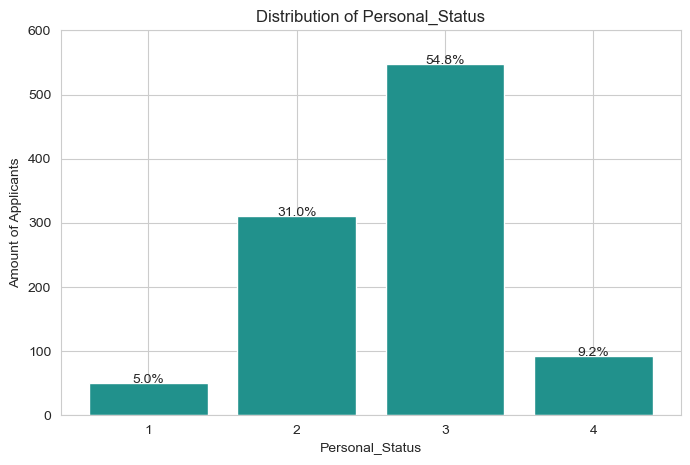

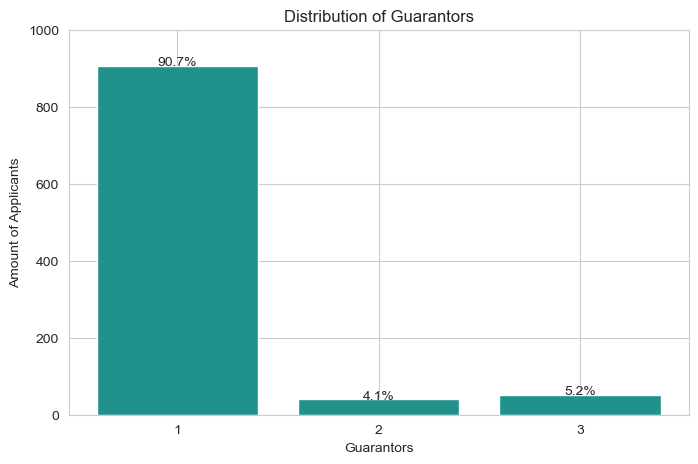

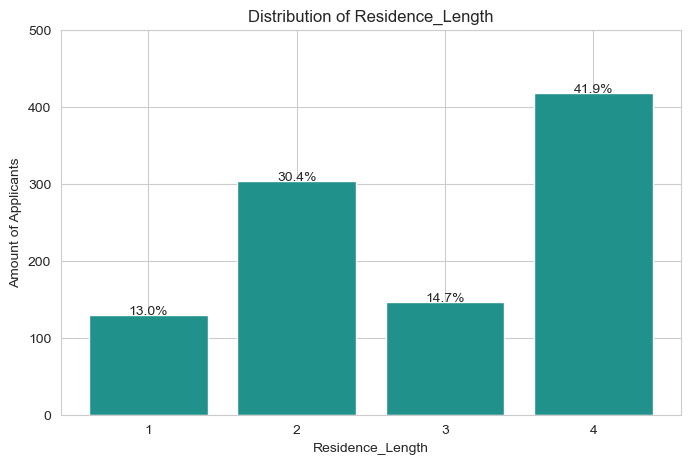

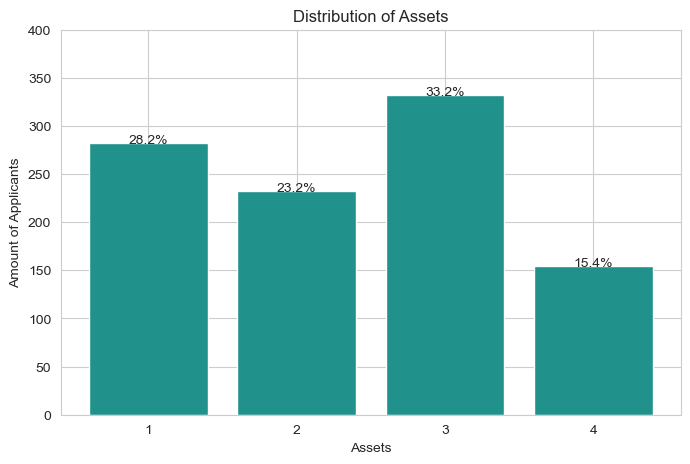

In [11]:
data = credit.groupby("Personal_Status").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Personal_Status")
plt.xlabel("Personal_Status")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
plt.ylim(0,600)


for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()


data = credit.groupby("Guarantors").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Guarantors")
plt.xlabel("Guarantors")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
plt.ylim(0,1000)


for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()




data = credit.groupby("Residence_Length").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Residence_Length")
plt.xlabel("Residence_Length")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
plt.ylim(0,500)


for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()


data = credit.groupby("Assets").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Assets")
plt.xlabel("Assets")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
plt.ylim(0,400)


for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()


**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** 

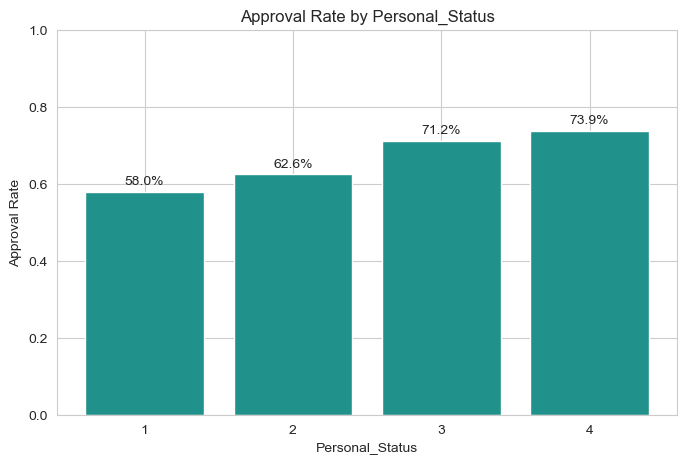

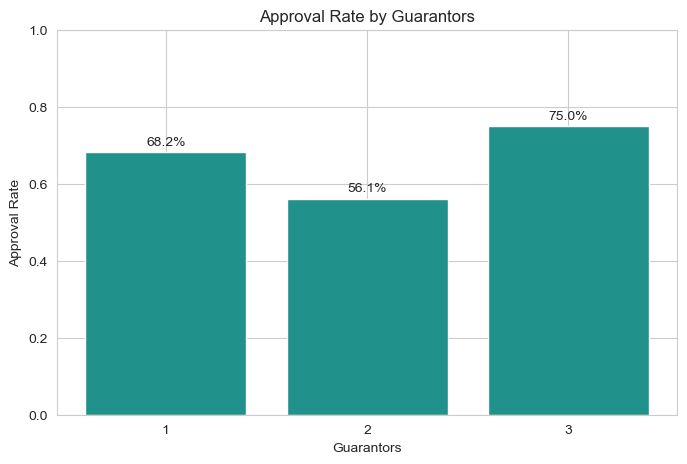

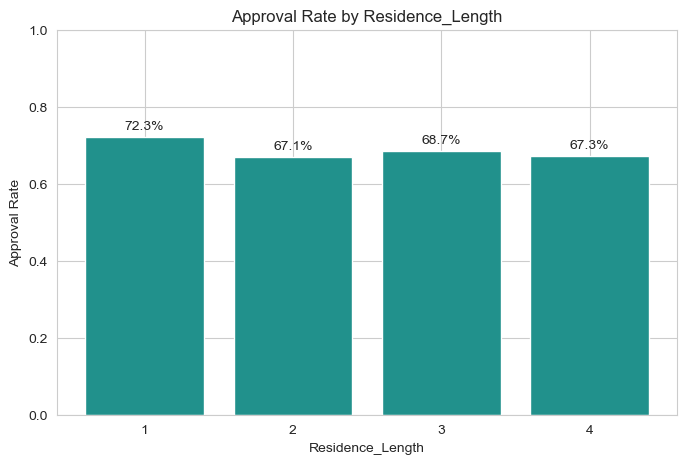

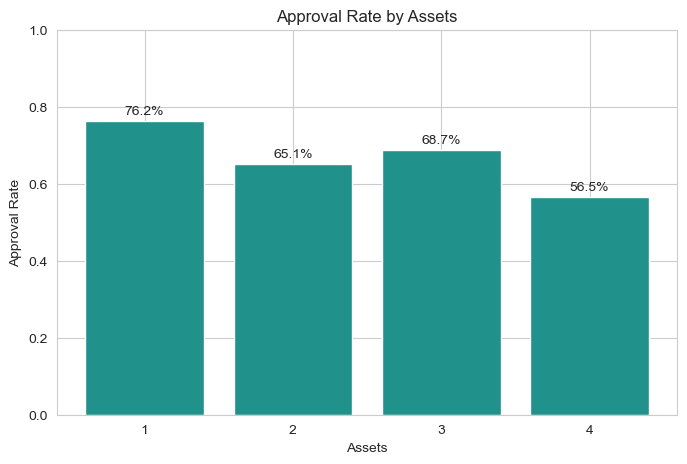

In [12]:

######################JARED#####################################
credit["Personal_Status"] = credit["Personal_Status"].astype(str)


# Calculate the approval rate for each savings account category
data = credit.groupby("Personal_Status")["Approval"].mean()


xs = data.index
ys = data


# Create the bar plot and store the bars in 'ax'
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(xs, ys, color=plt.cm.viridis(0.5))


# Title and labels
ax.set_title("Approval Rate by Personal_Status")
ax.set_xlabel("Personal_Status")
ax.set_ylabel("Approval Rate")


# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}', 
                (bar.get_x() + bar.get_width() / 2., height), 
                textcoords="offset points", 
                xytext=(0, 5),  # Slight offset above the bar
                ha="center")


# Set the y-axis limits to range from 0 to 1
ax.set_ylim(0, 1)


# Show the plot
plt.show()




credit["Guarantors"] = credit["Guarantors"].astype(str)


# Calculate the approval rate for each savings account category
data = credit.groupby("Guarantors")["Approval"].mean()


xs = data.index
ys = data


# Create the bar plot and store the bars in 'ax'
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(xs, ys, color=plt.cm.viridis(0.5))


# Title and labels
ax.set_title("Approval Rate by Guarantors")
ax.set_xlabel("Guarantors")
ax.set_ylabel("Approval Rate")


# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}', 
                (bar.get_x() + bar.get_width() / 2., height), 
                textcoords="offset points", 
                xytext=(0, 5),  # Slight offset above the bar
                ha="center")


# Set the y-axis limits to range from 0 to 1
ax.set_ylim(0, 1)


# Show the plot
plt.show()




credit["Residence_Length"] = credit["Residence_Length"].astype(str)


# Calculate the approval rate for each savings account category
data = credit.groupby("Residence_Length")["Approval"].mean()


xs = data.index
ys = data


# Create the bar plot and store the bars in 'ax'
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(xs, ys, color=plt.cm.viridis(0.5))


# Title and labels
ax.set_title("Approval Rate by Residence_Length")
ax.set_xlabel("Residence_Length")
ax.set_ylabel("Approval Rate")


# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}', 
                (bar.get_x() + bar.get_width() / 2., height), 
                textcoords="offset points", 
                xytext=(0, 5),  # Slight offset above the bar
                ha="center")


# Set the y-axis limits to range from 0 to 1
ax.set_ylim(0, 1)


# Show the plot
plt.show()




credit["Assets"] = credit["Assets"].astype(str)


# Calculate the approval rate for each savings account category
data = credit.groupby("Assets")["Approval"].mean()


xs = data.index
ys = data


# Create the bar plot and store the bars in 'ax'
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(xs, ys, color=plt.cm.viridis(0.5))


# Title and labels
ax.set_title("Approval Rate by Assets")
ax.set_xlabel("Assets")
ax.set_ylabel("Approval Rate")


# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}', 
                (bar.get_x() + bar.get_width() / 2., height), 
                textcoords="offset points", 
                xytext=(0, 5),  # Slight offset above the bar
                ha="center")


# Set the y-axis limits to range from 0 to 1
ax.set_ylim(0, 1)


# Show the plot
plt.show()
